In [1]:
import sys
sys.path.append("/home/m/murray/dtolgay/scratch")
from tools import constants

import numpy as np 
import pandas as pd

epsilon = 1e-30

import matplotlib.pyplot as plt 

In [2]:

def read_training_data(base_file_dir, main_directory, file_name, properties_column_names):

    #################################################
    # Get the trained data
    print("Training data is started to be read.")

    # Read file
    path2TrainingData = f"{base_file_dir}/{main_directory}/{file_name}"
    unprocessed_train_data = pd.read_csv(path2TrainingData) 

    ############## Process the cloudy data 
    # Take the log of the properties 
    properties_column_names_with_log = []
    for property in properties_column_names:
        unprocessed_train_data[property] += epsilon # Add a very small number 
        unprocessed_train_data[f"log_{property}"] = np.log10(unprocessed_train_data[property])
        properties_column_names_with_log.append(f"log_{property}")

    # Discard all nan values 
    print("Dropping NaN containing lines")
    processed_train_data = unprocessed_train_data.dropna()        
    train_data_df = processed_train_data.drop(properties_column_names, axis=1) # Drop the columns which log is not taken.

    # # Double check if there is any NaN
    # if (np.isnan(train_data_df.values).any()):
    #     print("Still there are NaN values. Exiting with code 1...")
    #     exit(1)
    # elif (np.isinf(train_data_df.values).any()):
    #     print("Still there are inf values. Exiting with code 2...")
    #     exit(2)

    ######
    # Add the column density data to interpolate that too 
    train_data_df['log_column_density'] = np.log10(
        (10**train_data_df['log_hden'] / constants.cm2pc**3) * (10**train_data_df['log_radius']) * (constants.mu_h * constants.proton_mass * constants.kg2Msolar)
    ) # Msolar / pc^2

    print(f"{path2TrainingData} is read.")


    return train_data_df, properties_column_names_with_log


In [3]:
################ Read training data particles 
properties_column_names = [
    "fh2",
    "fCO",
]

# 1st set of run
train_data_base_file_dir_1 = "/scratch/m/murray/dtolgay/cloudy_runs/z_0"
train_data_main_directory_1 = "cr_1_CO87_CII_H_O3/cr_1_CO87_CII_H_O3_metallicity_above_minus_2" 

train_data_df_1, properties_column_names_with_log = read_training_data(
    base_file_dir = train_data_base_file_dir_1, 
    main_directory = train_data_main_directory_1, 
    file_name = "other_properties.csv", 
    properties_column_names = properties_column_names,
)    

# 2nd set of run
train_data_base_file_dir_2 = "/scratch/m/murray/dtolgay/cloudy_runs/z_0"
train_data_main_directory_2 = "cr_1_CO87_CII_H_O3/cr_1_CO87_CII_H_O3_metallicity_minus2_minus3point5" 

train_data_df_2, properties_column_names_with_log = read_training_data(
    base_file_dir = train_data_base_file_dir_2, 
    main_directory = train_data_main_directory_2, 
    file_name = "other_properties.csv", 
    properties_column_names = properties_column_names,
)    


# Concattanete two dataframes 
train_data_df = pd.concat([train_data_df_2, train_data_df_1])
train_data_file_paths = [f"{train_data_base_file_dir_1}/{train_data_main_directory_1}", f"{train_data_base_file_dir_2}/{train_data_main_directory_2}"]

Training data is started to be read.
Dropping NaN containing lines
/scratch/m/murray/dtolgay/cloudy_runs/z_0/cr_1_CO87_CII_H_O3/cr_1_CO87_CII_H_O3_metallicity_above_minus_2/other_properties.csv is read.
Training data is started to be read.
Dropping NaN containing lines
/scratch/m/murray/dtolgay/cloudy_runs/z_0/cr_1_CO87_CII_H_O3/cr_1_CO87_CII_H_O3_metallicity_minus2_minus3point5/other_properties.csv is read.


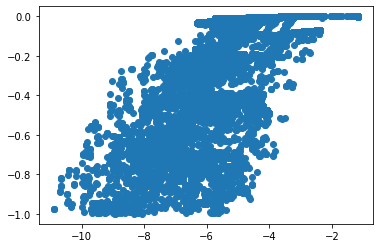

In [4]:
condition = train_data_df['log_fh2'] > -1 


plt.scatter(train_data_df[condition]['log_fCO'], train_data_df[condition]['log_fh2'])

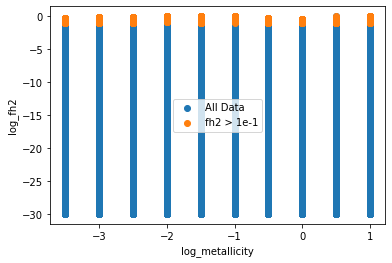

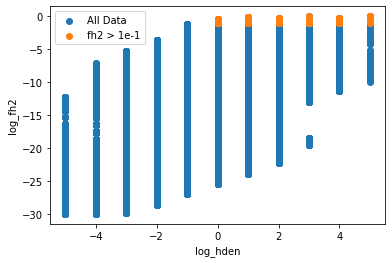

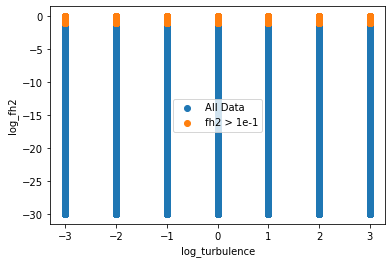

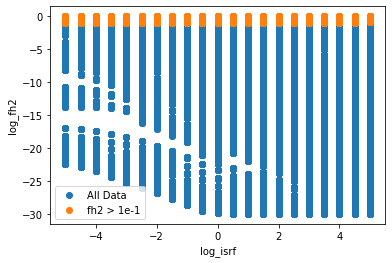

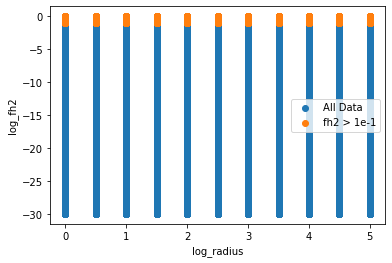

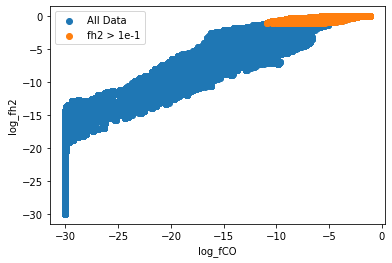

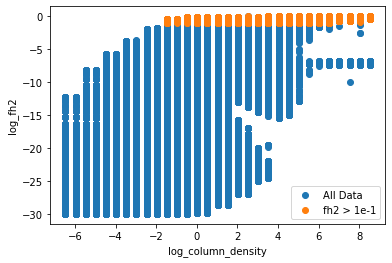

In [5]:
y_column = "log_fh2"

condition = train_data_df['log_fh2'] > -1 

for key in train_data_df.keys():
    if key != y_column:
        plt.figure()
        plt.scatter(train_data_df[key], train_data_df[y_column], label="All Data")
        plt.scatter(train_data_df[condition][key], train_data_df[condition][y_column], label="fh2 > 1e-1")
        plt.xlabel(key)
        plt.ylabel(y_column)
        plt.legend()


In [ ]:
condition = train_data_df['log_fCO'] > 16.5

train_data_df[condition].sort_values(by='log_radius', ascending=True)